## Build configuration space

### Try shapely

In [84]:
import numpy as np
from shapely.geometry import Polygon, MultiPolygon
from shapely import affinity

In [3]:
cube_d = 58
heap_radius = (cube_d**2 + (cube_d * 3) ** 2) ** .5 / 2
#cube_mask = np.zeros()

In [16]:
d_cube_zone = 500
n_cube_zone = int(d_cube_zone / dx)
heap_mask = np.zeros((n_cube_zone, n_cube_zone, n_a))

In [17]:
heap_mask.shape

(20, 20, 24)

In [89]:
s = 58 / 2
heap = Polygon([(s,3*s),(s,s),(3*s,s),(3*s,-s),(s,-s),(s,-3*s),(-s,-3*s),(-s,-s),(-3*s,-s),(-3*s,s),(-s,s),(-s,3*s)])

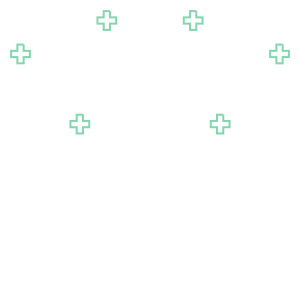

In [137]:
heaps = MultiPolygon([affinity.translate(heap, xoff=850, yoff=540),
                      affinity.translate(heap, xoff=300, yoff=1190),
                      affinity.translate(heap, xoff=1100, yoff=1500),
                      affinity.translate(heap, xoff=1900, yoff=1500),
                      affinity.translate(heap, xoff=2700, yoff=1190),
                      affinity.translate(heap, xoff=2150, yoff=540)])
heaps.boundary

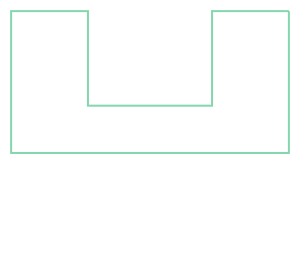

In [138]:
# robot size
l1 = 420
l2 = 190
dl = 25 # to pretend the robot is biger than it actually is
dli = 5 # to pretend the robot is biger than it actually is
dc = 60
m = 58
robot = Polygon([(l1/2+dl,l2/2+dl-dc),(l1/2+dl,-l2/2-dl-dc),(-l1/2-dl,-l2/2-dl-dc),(-l1/2-dl,l2/2+dl-dc),
                 (-l1/2+100+dli,l2/2+dl-dc),(-l1/2+100+dli,l2/2-140-dc+dli),
                 (l1/2-100-dli,l2/2-140-dc+dli),(l1/2-100-dli,l2/2+dl-dc)])
robot.boundary

In [139]:
robot.bounds

(-235.0, -180.0, 235.0, 60.0)

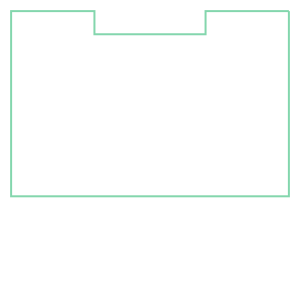

In [140]:
WORLD_X = 3000
WORLD_Y = 2000
WASTE_X = 1200
WASTE_Y = 250
field = Polygon([(WORLD_X,WORLD_Y),(WORLD_X,0),(0,0),(0,WORLD_Y),
                 ((WORLD_X-WASTE_X)/2,WORLD_Y),((WORLD_X-WASTE_X)/2,WORLD_Y-WASTE_Y),((WORLD_X+WASTE_X)/2,WORLD_Y-WASTE_Y),((WORLD_X+WASTE_X)/2,WORLD_Y)])
field.boundary

In [77]:
dx = 25
n_x = int(WORLD_X / dx)
dy = 25
n_y = int(WORLD_Y / dy)
da = 10 # in degrees
da_rad = da / 180 * np.pi
n_a = int(360 / da)

In [144]:
# 0 - free
# 1 - obstacle
conf_space = np.zeros((n_x, n_y, n_a))

for i in range(n_x):
    for j in range(n_y):
        robot1 = affinity.translate(robot, xoff=i*dx, yoff=j*dy)
        for k in range(n_a):
            robot2 = affinity.rotate(robot1, k*da)
            if robot2.intersects(heaps):
                conf_space[i,j,k] = 1
                continue
            if not field.contains(robot2):
                conf_space[i,j,k] = 1
                continue
    print(i/n_x)

0.0
0.008333333333333333
0.016666666666666666
0.025
0.03333333333333333
0.041666666666666664
0.05
0.058333333333333334
0.06666666666666667
0.075
0.08333333333333333
0.09166666666666666
0.1
0.10833333333333334
0.11666666666666667
0.125
0.13333333333333333
0.14166666666666666
0.15
0.15833333333333333
0.16666666666666666
0.175
0.18333333333333332
0.19166666666666668
0.2
0.20833333333333334
0.21666666666666667
0.225
0.23333333333333334
0.24166666666666667
0.25
0.25833333333333336
0.26666666666666666
0.275
0.2833333333333333
0.2916666666666667
0.3
0.30833333333333335
0.31666666666666665
0.325
0.3333333333333333
0.3416666666666667
0.35
0.35833333333333334
0.36666666666666664
0.375
0.38333333333333336
0.39166666666666666
0.4
0.4083333333333333
0.4166666666666667
0.425
0.43333333333333335
0.44166666666666665
0.45
0.4583333333333333
0.4666666666666667
0.475
0.48333333333333334
0.49166666666666664
0.5
0.5083333333333333
0.5166666666666667
0.525
0.5333333333333333
0.5416666666666666
0.55
0.558333

In [145]:
# SAVE
np.save('conf_space', conf_space)

TODO: exclude opponent's starting and building areas, water towers. (make 2 versions depending on team color)

### Visualize

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook 

In [161]:
conf_space = np.load('conf_space.npy')

In [183]:
x,y,z = conf_space.nonzero()

<IPython.core.display.Javascript object>


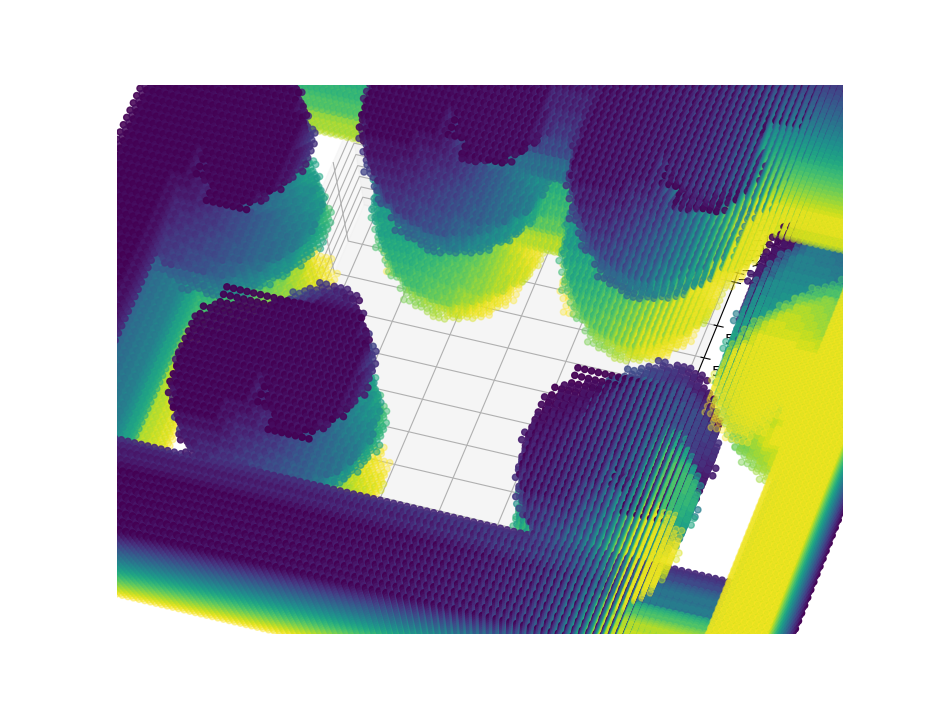

In [184]:
# PLOT 3D points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, -z, zdir='z', c= z)
#plt.savefig("demo.png")
plt.show()

<IPython.core.display.Javascript object>


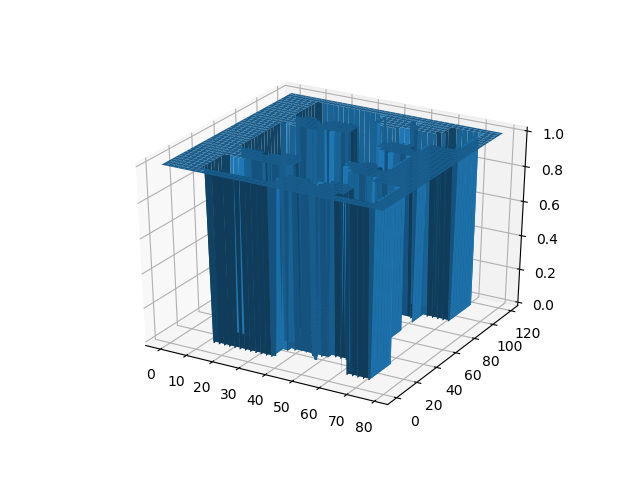

In [162]:
# Plot 1 layer as 3D surface
nx, ny = 256, 1024
x = range(80)
y = range(120)

data = conf_space[:,:,8]

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, data)

plt.show()